<a href="https://colab.research.google.com/github/repairedserver/Test/blob/master/Data_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import torch
import torchvision
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd/content/gdrive/My Drive/deeplearningbro/deeplearningbro/pytorch

/content/gdrive/My Drive/deeplearningbro/deeplearningbro/pytorch


In [4]:
def make_weight_for_balanced_classes(img, nclasses):
  labels = []
  for i in range(len(img)):
    labels.append(img[i][1])

  label_array = np.array(labels)
  total = len(labels)

  count_list = []
  for cls in range(nclasses):
    count = len(np.where(label_array == cls)[0])
    count_list.append(total/count)
  
  weight = []
  for label in label_array:
    weight.append(count_list[label])

  return weight

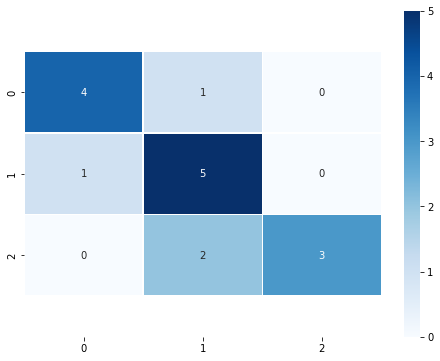

In [9]:
actual = [1,1,1,1,1,1,0,0,0,0,0,2,2,2,2,2]
prediction = [1,1,1,0,1,1,0,0,0,1,0,2,2,2,1,1]
cmat = confusion_matrix(actual, prediction)
plt.figure(figsize = (8,6))
sns.heatmap(cmat, annot=True, fmt="d", cmap="Blues", linewidths=.5)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.savefig('confusion_matrix.png')
plt.show()